In [4]:
import subprocess
import os
print('Current conda environment:', os.environ['CONDA_DEFAULT_ENV'])
os.environ['TOKENIZERS_PARALLELISM'] = "false"

cwd = os.getcwd()
print(cwd)

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(42)

Current conda environment: reinvent
/home/fts_g_ucla_edu/Projects/rips-relay/experiments


In [5]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

from crem.crem import grow_mol, mutate_mol
crem_db = '../crem_db/crem_db2.5.db'

import mols2grid

from rdkit import Chem
from rdkit.Chem import AllChem, rdFingerprintGenerator, CanonSmiles, Draw, MolFromSmiles, PandasTools
from rdkit.Chem.rdmolops import RDKFingerprint
from rdkit import DataStructs
from rdkit.DataStructs.cDataStructs import BulkTanimotoSimilarity
import useful_rdkit_utils as uru

import safe as sf
import datamol as dm

import mols2grid

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, roc_auc_score, RocCurveDisplay

import torch

from coati.generative.coati_purifications import embed_smiles
from coati.models.io.coati import load_e3gnn_smiles_clip_e2e
from coati.models.simple_coati2.io import load_coati2

In [6]:
pdb = '2zdt'

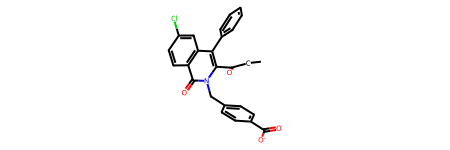

In [7]:
initial_mol = Chem.MolFromMolFile(f"data/docking/{pdb}_ligand.sdf")
initial = Chem.MolToSmiles(initial_mol)

initial_mol

In [8]:
initial

'CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc(C(=O)[O-])cc1'

## Reinvent

In [11]:
arg1 = '--model'
arg2 = '--dock'
arg3 = '--pdb'
arg4 = '--sample'

model = 'reinvent'

args = ['python3', 'generate_analogs.py',
        arg1, model,
        arg2,
        arg3, pdb,
        arg4, '500']

# Change directory to generate analogs with python script
%cd ..

subprocess.run(args,
               stdout=subprocess.DEVNULL,
               stderr=subprocess.STDOUT)
        
# Change directory back to that of the current notebook
%cd experiments

/home/fts_g_ucla_edu/Projects/rips-relay
/home/fts_g_ucla_edu/Projects/rips-relay/experiments


In [11]:
df = pd.read_csv('data/dataframe.csv', index_col=0)

ifp_reinvent = pd.read_csv('data/interaction_fingerprint.csv', header=[0, 1], index_col=0)

In [12]:
ifp_reinvent

protein        ASP22.A     ILE23.A                           ALA38.A  \
interaction VdWContact Hydrophobic HBAcceptor VdWContact Hydrophobic   
Frame                                                                  
0                 True        True       True       True       False   
1                 True        True       True       True       False   
2                 True        True       True       True       False   
3                 True        True       True       True       False   
4                 True        True       True       True       False   
...                ...         ...        ...        ...         ...   
222               True        True       True       True       False   
223               True        True       True       True       False   
224               True        True       True       True       False   
225               True        True       True       True       False   
226               True        True       True       True       False   

protein        GLY48.A     VAL49.A                ALA52.A             ...  \
interaction VdWContact Hydrophobic VdWContact Hydrophobic VdWContact  ...   
Frame                                                                 ...   
0                False        True       True        True      False  ...   
1                False        True      False        True      False  ...   
2                False        True       True       False      False  ...   
3                False        True       True       False      False  ...   
4                False        True       True       False      False  ...   
...                ...         ...        ...         ...        ...  ...   
222               True        True       True       False      False  ...   
223              False        True      False       False      False  ...   
224              False        True      False       False      False  ...   
225              False        True      False       False      False  ...   
226              False        True       True       False      False  ...   

protein       HOH427.A   HOH460.A              HOH471.A              HOH477.A  \
interaction VdWContact HBAcceptor VdWContact HBAcceptor VdWContact VdWContact   
Frame                                                                           
0                False      False      False      False       True      False   
1                False      False      False      False       True      False   
2                 True      False       True      False       True       True   
3                 True      False       True      False       True       True   
4                False      False       True      False       True       True   
...                ...        ...        ...        ...        ...        ...   
222              False      False      False      False      False      False   
223              False      False      False      False       True      False   
224              False      False      False      False       True      False   
225              False      False      False      False       True      False   
226              False      False      False      False      False      False   

protein       HOH486.A              HOH489.A   HOH495.A  
interaction HBAcceptor VdWContact VdWContact VdWContact  
Frame                                                    
0                False      False      False       True  
1                False      False      False       True  
2                False      False       True       True  
3                False      False       True       True  
4                False      False       True       True  
...                ...        ...        ...        ...  
222              False      False      False      False  
223              False      False      False       True  
224              False      False      False       True  
225              False      False      False       True  
226              False 

In [10]:
df

,SMILES,Model
0,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
1,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
2,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
3,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
4,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
...,...,...
628,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
629,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
630,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
631,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem


In [16]:
df = df.sample(500)

df

ValueError: Cannot take a larger sample than population when 'replace=False'

### CReM

In [17]:
arg1 = '--model'
arg2 = '--dock'
arg3 = '--pdb'
arg4 = '--sample'

model = 'crem'

args = ['python3', 'generate_analogs.py',
        arg1, model,
        arg2,
        arg3, pdb,
        arg4, '500']

# Change directory to generate analogs with python script
%cd ..

subprocess.run(args,
               stdout=subprocess.DEVNULL,
               stderr=subprocess.STDOUT)
        
# Change directory back to that of the current notebook
%cd experiments

/home/fts_g_ucla_edu/Projects/rips-relay
/home/fts_g_ucla_edu/Projects/rips-relay/experiments


In [18]:
temp_df = pd.read_csv('data/datafrane,csv', index_col=0)

ifp_crem = pd.read_csv('data/interaction_fingerprint.csv', header=[0, 1], index_col=0)

In [19]:
temp_df

,Unnamed: 0,SMILES,Input_SMILES,Tanimoto,Prior,Name,Success,ID,Docking score
0,0,c1ncc2c(n1)CCNC2,c1ncc2c(n1)NCC2,0.500000,medium_similarity,MOL0000,False,MOL0000,-5.744287
1,1,CC1CNc2ncncc21,c1ncc2c(n1)NCC2,0.435897,medium_similarity,MOL0001,True,MOL0001,-6.683917
2,2,c1ncc2[nH]cnc2n1,c1ncc2c(n1)NCC2,0.317073,medium_similarity,MOL0002,True,MOL0002,-5.385806
3,3,Cc1ncc2c(n1)NCC2,c1ncc2c(n1)NCC2,0.513514,medium_similarity,MOL0003,False,MOL0003,-6.261935
4,4,c1ncc2c(n1)NCC2,c1ncc2c(n1)NCC2,1.000000,medium_similarity,MOL0004,True,MOL0004,-6.471065
...,...,...,...,...,...,...,...,...,...
229,229,O=S(=O)(c1ncc2c(n1)NCC2)C1CC1,c1ncc2c(n1)NCC2,0.240000,medium_similarity,MOL0229,False,MOL0229,-4.549739
230,230,c1ncc2c(n1)NC[C@@H]2CCCN1CCCCC1,c1ncc2c(n1)NCC2,0.309091,medium_similarity,MOL0230,True,MOL0230,-7.163086
231,231,c1ncc2c(n1)NC(CC1CCCCC1)C2,c1ncc2c(n1)NCC2,0.512821,medium_similarity,MOL0231,False,MOL0231,-6.611970
232,232,C(#Cc1ncc2c(n1)NCC2)Cc1cccnc1,c1ncc2c(n1)NCC2,0.333333,medium_similarity,MOL0232,False,MOL0232,-4.402618


In [ ]:
temp_df = temp_df.sample(500)

temp_df

,SMILES,Model
512,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
343,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
263,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
373,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
460,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
...,...,...
504,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
15,O=C([O-])c1ccc(Cn2c(C(=O)CI)c(-c3ccccc3)c3cc(C...,crem
444,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem
520,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,crem


In [ ]:
df = pd.concat((df, temp_df))

### Coati

In [ ]:
arg1 = '--model'
arg2 = '--dock'
arg3 = '--pdb'
arg4 = '--sample'

model = 'coati'

args = ['python3', 'generate_analogs.py',
        arg1, model,
        arg2,
        arg3, pdb,
        arg4, '500']

# Change directory to generate analogs with python script
%cd ..

subprocess.run(args,
               stdout=subprocess.DEVNULL,
               stderr=subprocess.STDOUT)
        
# Change directory back to that of the current notebook
%cd experiments

Loading model from s3://terray-public/models/coati2_chiral_03-08-24.pkl
Loading tokenizer coati2_12_12 from s3://terray-public/models/coati2_chiral_03-08-24.pkl
number of parameters: 50.44M
number of parameters Total: xformer: 54.81M 
vocab_name not found in tokenizer_vocabs, trying to load from file
Freezing encoder
56385536 params frozen!


In [ ]:
temp_df = pd.read_csv('data/datafrane,csv', index_col=0)

ifp_coati = pd.read_csv('data/interaction_fingerprint.csv', header=[0, 1], index_col=0)

In [ ]:
temp_df

,SMILES,Model
0,CCC(=O)c1c(-c2ccc(-c3ccccc3)cc2)c2cc(Cl)ccc2c(...,coati
1,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,coati
2,CCC(=O)c1c(-c2ccc(Cl)cc2)c2cc(Cl)ccc2c(=O)n1Cc...,coati
3,CCCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc...,coati
4,CC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc(...,coati
...,...,...
230,CCC(=O)c1[nH+]c2ccc(Cl)cc2n1-c1ccc(C(=O)[O-])cc1,coati
231,Cc1[nH+]c(-c2ccccc2)c(Cl)c(Cl)c1COc1ccc(C(=O)[...,coati
232,CCC1=C([O-])c2cc(-c3ccccc3)c(Cl)cc2C1=O,coati
233,CCC(=CC1=C(c2ccccc2)N(Cc2ccc(C(=O)[O-])cc2)C1=...,coati


In [ ]:
df = pd.concat((df, temp_df))

### SAFE

In [ ]:
arg1 = '--model'
arg2 = '--dock'
arg3 = '--pdb'
arg4 = '--sample'

model = 'safe'

args = ['python3', 'generate_analogs.py',
        arg1, model,
        arg2,
        arg3, pdb,
        arg4, '500']

# Change directory to generate analogs with python script
%cd ..

subprocess.run(args,
               stdout=subprocess.DEVNULL,
               stderr=subprocess.STDOUT)
        
# Change directory back to that of the current notebook
%cd experiments

In [ ]:
temp_df = pd.read_csv('data/datafrane,csv', index_col=0)

ifp_safe = pd.read_csv('data/interaction_fingerprint.csv', header=[0, 1], index_col=0)

In [ ]:
len(df)

954

In [ ]:
#rename df to merge it with molscore df
model_df=df
model_df=model_df.rename(columns={'SMILES': 'smiles'})

In [ ]:
model_df.to_csv('data/dataframe.csv')

In [ ]:
model_df = pd.read_csv('data/dataframe.csv')

In [ ]:
y = model_df['Model'].to_numpy().reshape(-1, 1)

In [ ]:
smiles = model_df['smiles'].to_list()

In [ ]:
smiles

['CCC(=O)c1c(-c2ccccc2)c2ccccc2c(=O)n1Cc1ccc([N+](=O)[O-])cc1',
 'CC/C=C/c1c(-c2ccccc2)c2ccccc2c(=O)n1Cc1ccc(C(=O)O)cc1',
 'CCOC(=O)c1c(-c2ccc(CO)cc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc(S(C)(=O)=O)cc1',
 'CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1nc(C(=O)O)cs1',
 'CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc(N)ncc1C',
 'CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc(S(C)(=O)=O)n(CCO)n1',
 'CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc(C(=O)NC)nc1',
 'CCC(=O)c1c(-c2cccc(C)c2)c2cc(Cl)ccc2c(=O)n1Cc1ccc(C(=O)O)cc1',
 'COc1ccc(Cn2c(C(=O)C(C)C)c(-c3ccccc3)c3cc(Cl)ccc3c2=O)cc1',
 'COC(=O)c1ccc(Cn2c(C(=O)O)c(-c3ccccc3)c3cc(Br)ccc3c2=O)cc1',
 'C=CC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc(S(C)(=O)=O)n(CC(C)=O)n1',
 'CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc(C(=O)O)n(CCO)n1',
 'CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc(C(=O)N2CCSCC2)n(C)n1',
 'CCCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc(NC(C)=O)cc1',
 'CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc(C(=O)NC)cc1',
 'CCC(=O)c1c(-c2ccccc2)c2cc(

### Evaluating Metrics w/ MolScore

In [ ]:
from molscore import MolScore

In [ ]:
ms = MolScore(model_name='mol2mol', task_config='molscore/feature_selection.json')
scores = ms.score(smiles)

Found existing rascore-env
Launching server: conda run -n rascore-env python /home/fts_g_ucla_edu/.local/lib/python3.10/site-packages/molscore/scoring_functions/servers/rascore_server.py --port 8018 --model_path /home/fts_g_ucla_edu/.local/lib/python3.10/site-packages/molscore/data/models/RAScore/XGB_chembl_ecfp_counts/model.pkl


In [ ]:
# Once finished
metrics = ms.compute_metrics(
    endpoints=None, # Optional list: by default will use the running final score/reward value
    thresholds=None,  # Optional list: if specified will calculate the yield of molecules above that threshold 
    # chemistry_filters_basic=False,  # Optional, bool: Additionally re-calculate metrics after filtering out unreasonable chemistry
    budget=10000,  # Optional, int: Calculate metrics only with molecules within this budget
    n_jobs=1,  # Optional, int: Multiprocessing
    benchmark=None,  # Optional, str: Name of benchmark, this may specify additional metrics to compute
)

### Random Forest Classification

In [ ]:
df = pd.read_csv('molscore/2024_07_16_mol2mol_feature_selection_15_36_54/iterations/000001_scores.csv')

In [ ]:
df

,Unnamed: 0,model,task,step,batch_idx,absolute_time,smiles,valid,valid_score,unique,...,desc_FlourineCount,tanimoto_Sim,tanimoto_Cmpd1_Sim,dice_Sim,dice_Cmpd1_Sim,RAScore_pred_proba,raw_valid_score,amean,filter,score_time
0,0,mol2mol,feature_selection,1,0,3.349948,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,True,1,True,...,0,0.698413,0.698413,0.822430,0.822430,0.902135,1,1.0,1.0,17.60698
1,1,mol2mol,feature_selection,1,1,3.349948,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc(...,True,1,True,...,0,0.554054,0.554054,0.713043,0.713043,0.705310,1,1.0,1.0,17.60698
2,2,mol2mol,feature_selection,1,2,3.349948,CCC(=O)c1ccc(Cn2c(C(=O)CC)c(-c3ccccc3)c3cc(Cl)...,True,1,True,...,0,0.867925,0.867925,0.929293,0.929293,0.856850,1,1.0,1.0,17.60698
3,3,mol2mol,feature_selection,1,3,3.349948,NC(=O)c1ccc(Cn2c(N)c(-c3ccccc3)c3cc(Cl)ccc3c2=...,True,1,True,...,0,0.590164,0.590164,0.742268,0.742268,0.957462,1,1.0,1.0,17.60698
4,4,mol2mol,feature_selection,1,4,3.349948,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc(...,True,1,True,...,0,0.532468,0.532468,0.694915,0.694915,0.291597,1,1.0,1.0,17.60698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,1698,mol2mol,feature_selection,1,1698,3.349948,COCCN1C(=O)CCC1Cc1ccc(OC)cc1,True,1,True,...,0,0.141026,0.141026,0.247191,0.247191,0.940115,1,1.0,1.0,17.60698
1699,1699,mol2mol,feature_selection,1,1699,3.349948,O=C(Nc1nn(-c2ccc(F)cc2)c2c1CCC2)c1cc([N+](=O)[...,True,1,True,...,1,0.105263,0.105263,0.190476,0.190476,0.986689,1,1.0,1.0,17.60698
1700,1700,mol2mol,feature_selection,1,1700,3.349948,CCOP(=O)(CN1C(=O)c2c3c(c(O)c(F)c2[C@@H]1c1c(Cl...,True,1,True,...,1,0.150538,0.150538,0.261682,0.261682,0.020760,1,1.0,1.0,17.60698
1701,1701,mol2mol,feature_selection,1,1701,3.349948,C[C@@H]1C[NH+](Cc2ccccc2)C[C@@H]1CNC(=O)N1CC[C...,True,1,True,...,0,0.150538,0.150538,0.261682,0.261682,0.914463,1,1.0,1.0,17.60698


In [ ]:
df.drop(['Unnamed: 0', 'desc_MolecularFormula'], axis=1, inplace=True)

df

,model,task,step,batch_idx,absolute_time,smiles,valid,valid_score,unique,occurrences,...,desc_FlourineCount,tanimoto_Sim,tanimoto_Cmpd1_Sim,dice_Sim,dice_Cmpd1_Sim,RAScore_pred_proba,raw_valid_score,amean,filter,score_time
0,mol2mol,feature_selection,1,0,3.349948,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,True,1,True,0,...,0,0.698413,0.698413,0.822430,0.822430,0.902135,1,1.0,1.0,17.60698
1,mol2mol,feature_selection,1,1,3.349948,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc(...,True,1,True,0,...,0,0.554054,0.554054,0.713043,0.713043,0.705310,1,1.0,1.0,17.60698
2,mol2mol,feature_selection,1,2,3.349948,CCC(=O)c1ccc(Cn2c(C(=O)CC)c(-c3ccccc3)c3cc(Cl)...,True,1,True,0,...,0,0.867925,0.867925,0.929293,0.929293,0.856850,1,1.0,1.0,17.60698
3,mol2mol,feature_selection,1,3,3.349948,NC(=O)c1ccc(Cn2c(N)c(-c3ccccc3)c3cc(Cl)ccc3c2=...,True,1,True,0,...,0,0.590164,0.590164,0.742268,0.742268,0.957462,1,1.0,1.0,17.60698
4,mol2mol,feature_selection,1,4,3.349948,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc(...,True,1,True,0,...,0,0.532468,0.532468,0.694915,0.694915,0.291597,1,1.0,1.0,17.60698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,mol2mol,feature_selection,1,1698,3.349948,COCCN1C(=O)CCC1Cc1ccc(OC)cc1,True,1,True,0,...,0,0.141026,0.141026,0.247191,0.247191,0.940115,1,1.0,1.0,17.60698
1699,mol2mol,feature_selection,1,1699,3.349948,O=C(Nc1nn(-c2ccc(F)cc2)c2c1CCC2)c1cc([N+](=O)[...,True,1,True,0,...,1,0.105263,0.105263,0.190476,0.190476,0.986689,1,1.0,1.0,17.60698
1700,mol2mol,feature_selection,1,1700,3.349948,CCOP(=O)(CN1C(=O)c2c3c(c(O)c(F)c2[C@@H]1c1c(Cl...,True,1,True,0,...,1,0.150538,0.150538,0.261682,0.261682,0.020760,1,1.0,1.0,17.60698
1701,mol2mol,feature_selection,1,1701,3.349948,C[C@@H]1C[NH+](Cc2ccccc2)C[C@@H]1CNC(=O)N1CC[C...,True,1,True,0,...,0,0.150538,0.150538,0.261682,0.261682,0.914463,1,1.0,1.0,17.60698


In [ ]:
X = df.iloc[:, 10:-4]

In [ ]:
X.columns

Index(['desc_QED', 'desc_SAscore', 'desc_CLogP', 'desc_MolWt',
       'desc_HeavyAtomCount', 'desc_HeavyAtomMolWt', 'desc_NumHAcceptors',
       'desc_NumHDonors', 'desc_NumHeteroatoms', 'desc_NumRotatableBonds',
       'desc_NumAromaticRings', 'desc_NumAliphaticRings', 'desc_RingCount',
       'desc_TPSA', 'desc_PenLogP', 'desc_FormalCharge', 'desc_Bertz',
       'desc_MaxConsecutiveRotatableBonds', 'desc_FlourineCount',
       'tanimoto_Sim', 'tanimoto_Cmpd1_Sim', 'dice_Sim', 'dice_Cmpd1_Sim',
       'RAScore_pred_proba'],
      dtype='object')

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.fit_transform(y)

<1235x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1235 stored elements in Compressed Sparse Row format>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

ValueError: Found input variables with inconsistent numbers of samples: [1703, 1235]

In [ ]:
len(X_train)

1362

In [ ]:
len(X_test)

341

In [ ]:
rf = RandomForestClassifier(n_estimators=500,
                            class_weight='balanced',
                            random_state=1)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=1)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
precision = precision_score(y_pred, y_test, average='micro')

print(f'Precision score: {precision}')

Precision score: 0.9296187683284457


In [ ]:
weights = rf.feature_importances_
vars = X.columns

d = {'vars': vars, 'weights': weights}

rf_features = pd.DataFrame(data=d).sort_values(['weights'], ascending=False, ignore_index=True)

rf_features

,vars,weights
0,dice_Sim,0.127716
1,dice_Cmpd1_Sim,0.117762
2,desc_FormalCharge,0.117178
3,tanimoto_Sim,0.116186
4,tanimoto_Cmpd1_Sim,0.112701
5,desc_Bertz,0.058235
6,desc_QED,0.055216
7,desc_CLogP,0.045322
8,desc_HeavyAtomCount,0.037700
9,desc_MolWt,0.034125


### AdaBoost

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=1)

clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=1)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

0.8709677419354839

In [ ]:
weights = clf.feature_importances_
vars = X.columns

d = {'vars': vars, 'weights': weights}

adaboost_features = pd.DataFrame(data=d).sort_values(['weights'], ascending=False, ignore_index=True)

adaboost_features

NameError: name 'clf' is not defined

## Visualizations

### Random Forest

In [ ]:
# Match each molecule with its corresponding model
df=pd.merge(df, model_df, on='smiles')

In [ ]:
df

,model,task,step,batch_idx,absolute_time,smiles,valid,valid_score,unique,occurrences,...,tanimoto_Cmpd1_Sim,dice_Sim,dice_Cmpd1_Sim,RAScore_pred_proba,raw_valid_score,amean,filter,score_time,Unnamed: 0,Model
0,mol2mol,feature_selection,1,0,3.349948,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc...,True,1,True,0,...,0.698413,0.822430,0.822430,0.902135,1,1.0,1.0,17.60698,530,crem
1,mol2mol,feature_selection,1,1,3.349948,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc(...,True,1,True,0,...,0.554054,0.713043,0.713043,0.705310,1,1.0,1.0,17.60698,288,reinvent
2,mol2mol,feature_selection,1,1,3.349948,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1cc(...,True,1,True,0,...,0.554054,0.713043,0.713043,0.705310,1,1.0,1.0,17.60698,1059,reinvent
3,mol2mol,feature_selection,1,2,3.349948,CCC(=O)c1ccc(Cn2c(C(=O)CC)c(-c3ccccc3)c3cc(Cl)...,True,1,True,0,...,0.867925,0.929293,0.929293,0.856850,1,1.0,1.0,17.60698,665,reinvent
4,mol2mol,feature_selection,1,2,3.349948,CCC(=O)c1ccc(Cn2c(C(=O)CC)c(-c3ccccc3)c3cc(Cl)...,True,1,True,0,...,0.867925,0.929293,0.929293,0.856850,1,1.0,1.0,17.60698,34,reinvent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,mol2mol,feature_selection,1,1125,3.349948,CCC(=O)c1c(-c2ccccc2)c2cc(Cl)ccc2n(CC(=O)[O-])...,True,1,True,0,...,0.507692,0.673469,0.673469,0.971880,1,1.0,1.0,17.60698,115,coati
950,mol2mol,feature_selection,1,1128,3.349948,CCC(=O)[n+]1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1...,True,1,True,0,...,0.584615,0.737864,0.737864,0.937935,1,1.0,1.0,17.60698,120,coati
951,mol2mol,feature_selection,1,1129,3.349948,CCC(=O)c1c(-c2ccccc2)n(Cc2ccc(C(=O)[O-])cc2)c2...,True,1,True,0,...,0.612903,0.760000,0.760000,0.973292,1,1.0,1.0,17.60698,117,coati
952,mol2mol,feature_selection,1,1138,3.349948,CC[n+]1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1Cc1ccc(C...,True,1,True,0,...,0.596774,0.747475,0.747475,0.807708,1,1.0,1.0,17.60698,130,coati


In [ ]:
# Create dataframes with data from top five predictors
# dice_Sim	0.127716
# 1	dice_Cmpd1_Sim	0.117762
# 2	desc_FormalCharge	0.117178
# 3	tanimoto_Sim	0.116186
# 4	tanimoto_Cmpd1_Sim	0.112701
data = {
    'Model':df['Model'].to_list(),
    'smiles': df['smiles'].to_list(),
    'Dice Similarity': df['dice_Sim'].to_list(),
    # 'Dice Similarity Compound 1': [df['dice_Cmpd1_Sim']],
    # 'Formal Charge': [df['desc_FormalCharge']],
    # 'Tanimoto Similarity': [df['tanimoto_Sim']],
    # 'Tanimoto Similarity Compound 1': [df['tanimoto_Cmpd1_Sim']],
}
predictors_df=pd.DataFrame(data=data)

In [ ]:
predictors_df['Model'].nunique()

3

[[Text(0, 1, ''), Text(0, 2, ''), Text(0, 3, '')]]

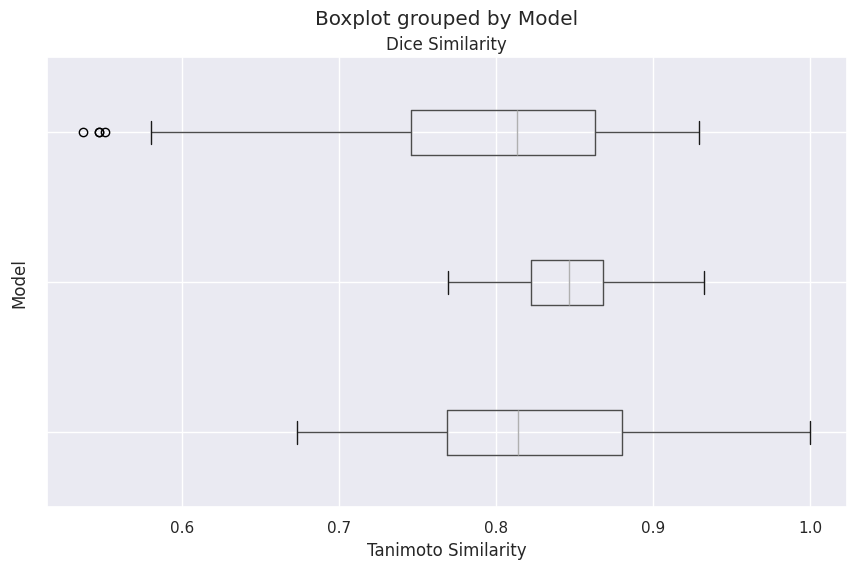

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

params = {'vert' : 0}

predictors_df.boxplot(column=['Dice Similarity'], by='Model', ax=ax, **params)

plt.xlabel('Tanimoto Similarity')

ax = plt.gca()
ax.set(yticklabels=[])

# title = f'Tanimoto similarities between analogs and lead molecule'
# subtitle = f'Input Fragment: {initial_fragment_smiles}, Lead: {lead_smiles}'

# fig.suptitle(title)
# plt.title(subtitle, fontsize=10);